Reading Images and Videos (Input)

This is how we can read in a image file and display it. 

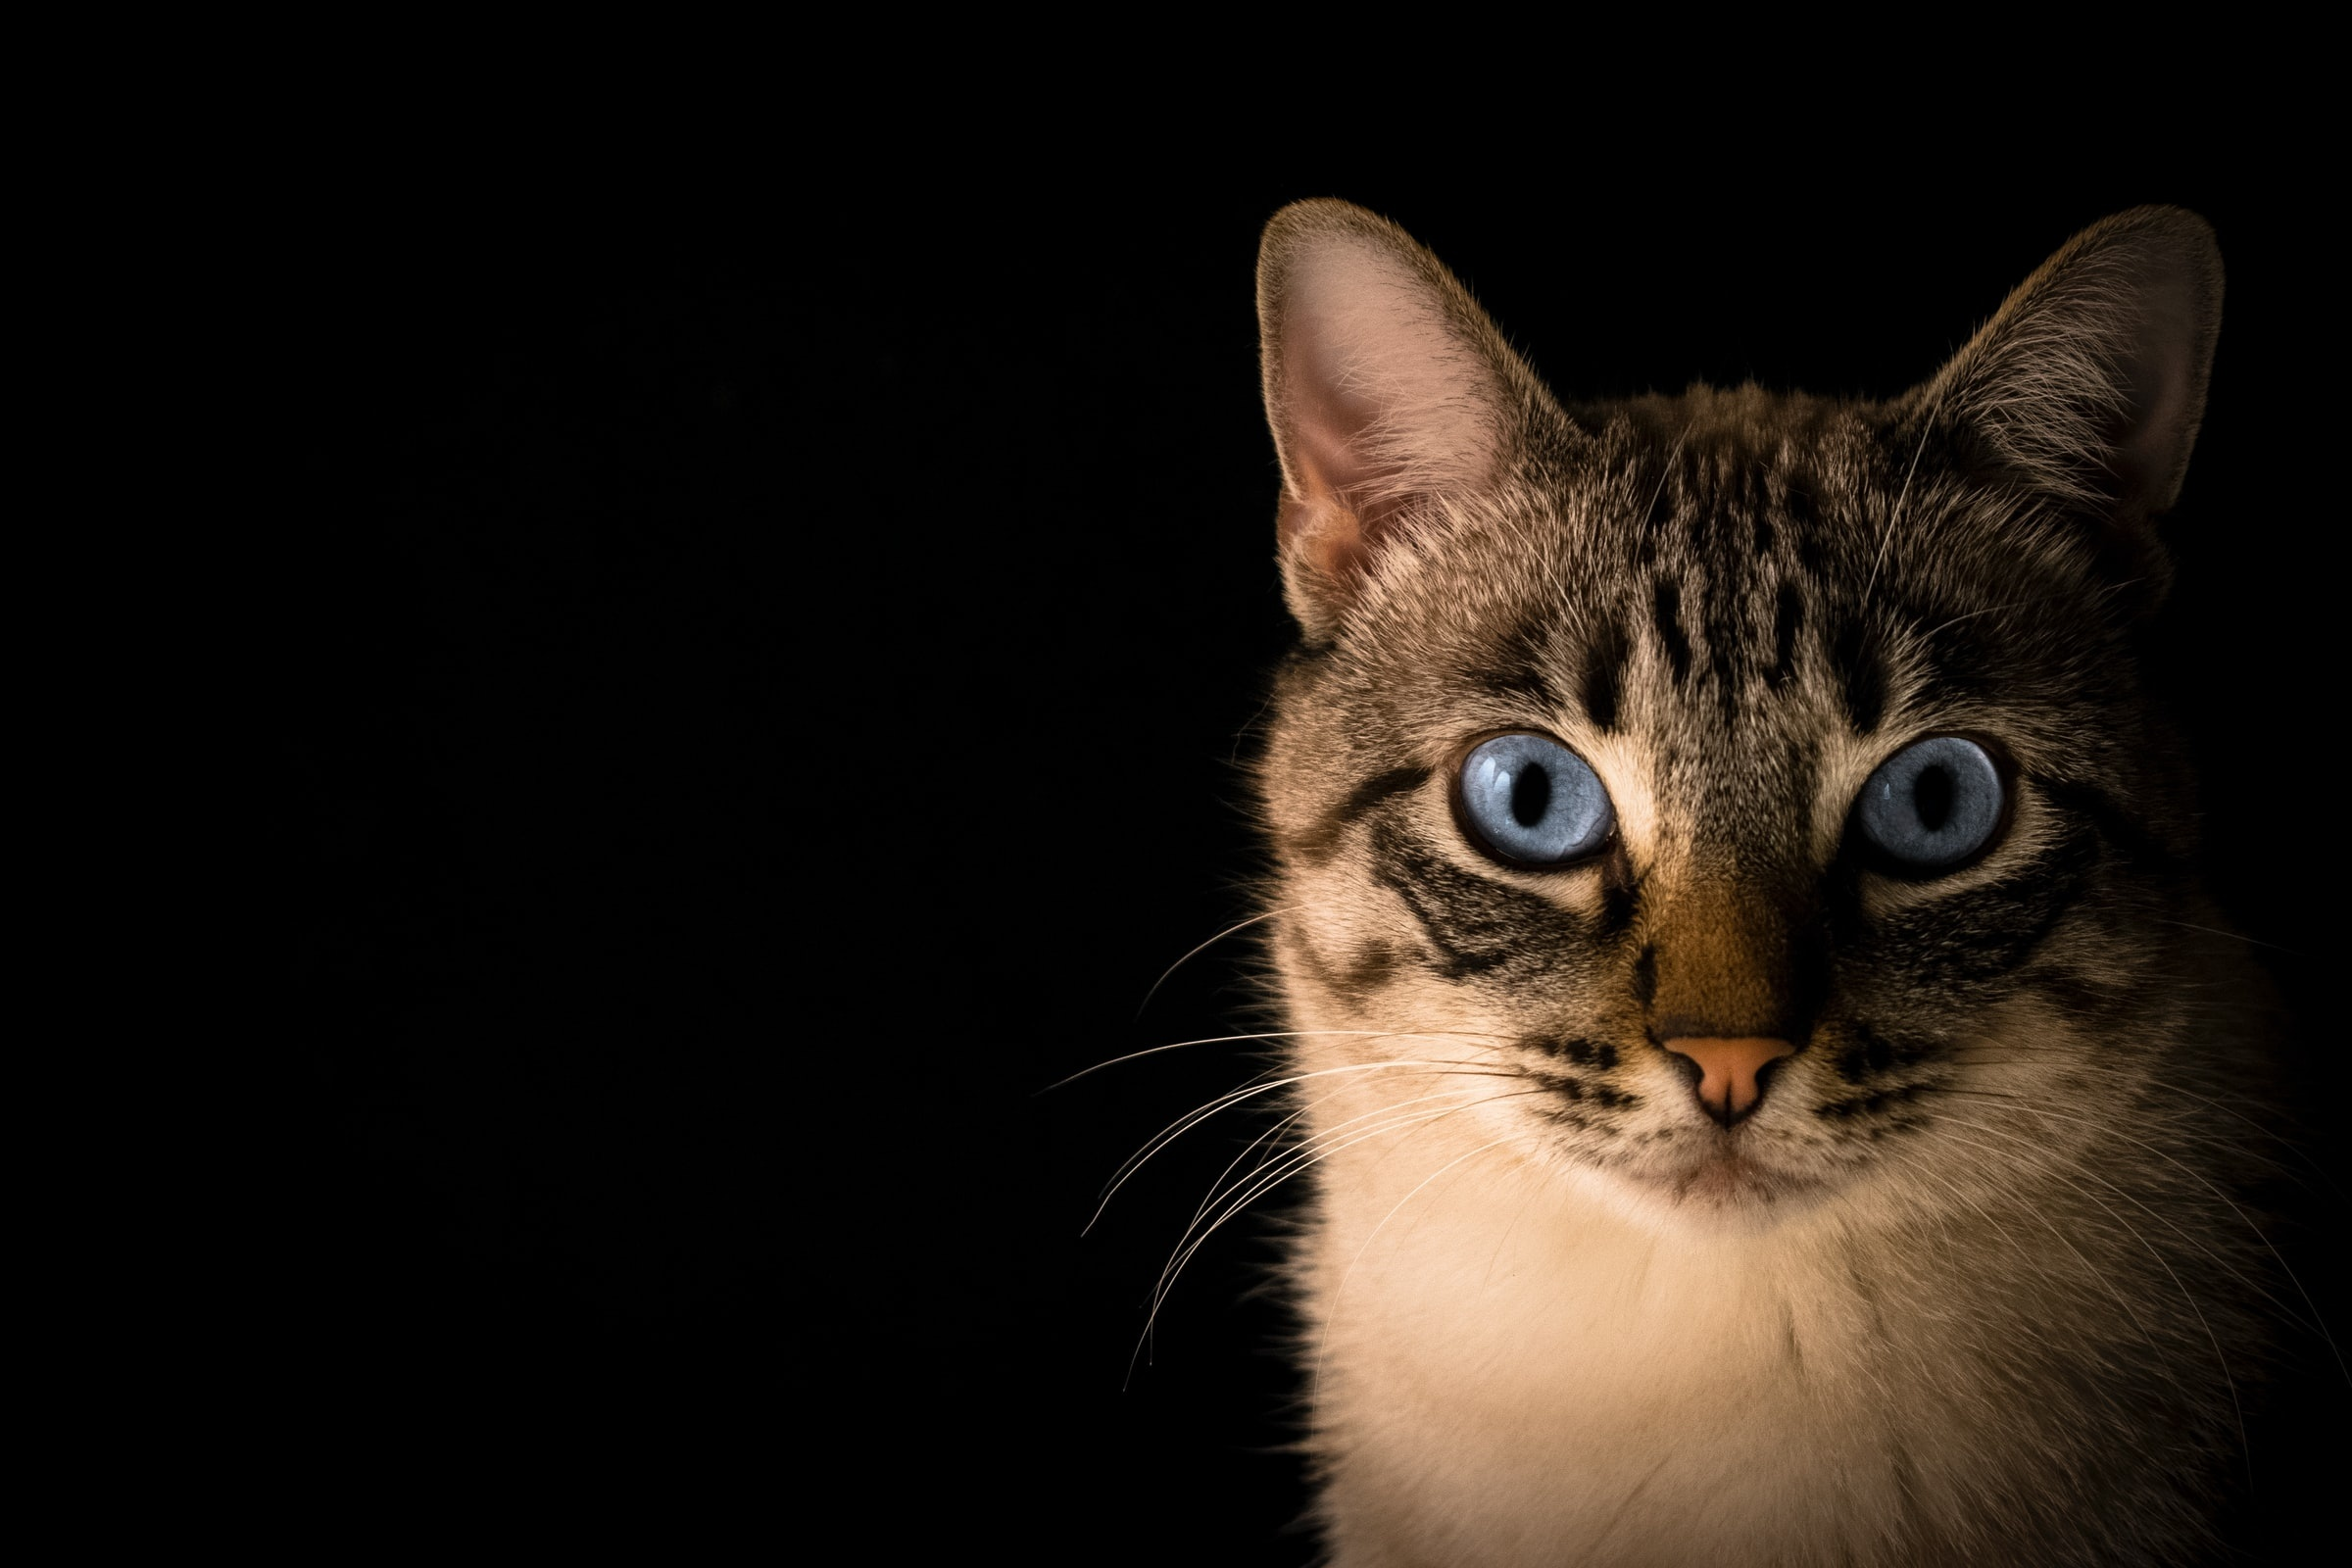

In [5]:
import cv2
from IPython.display import Image, display
import numpy as np

# Read the image
img = cv2.imread('Resources/Photos/cat_large.jpg')

# Save temporarily and display
cv2.imwrite('temp_image.jpg', img)
display(Image('temp_image.jpg'))

How to read videos in Opencv
In opencv it reads videos by frames, and in order to playback we replay the saved frames as shown below

In [6]:
import cv2

# Open video
capture = cv2.VideoCapture('Resources/Videos/kitten.mp4') # This captures the frames from the video 
# capture = cv2.VideoCapture(0) # This captures the frames from the webcam, 0 is the default camera

while True:
    # Read frame
    ret, frame = capture.read()
    
    # If no frame, stop
    if not ret:
        break
    
    # Show frame
    cv2.imshow('Video', frame)
    
    # Wait 30ms, press 'q' to quit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

capture.release()

Resizing and Rescaling Img/Vid frames, to prevent computational strain. 
Downscaling with height/width to reduce the image data

Rescale Video

In [7]:
def rescaleFrame(frame, scale=0.75):
    width = int(frame.shape[1] * scale)# this muliplies the frame of the image with downscale varible 
    height = int(frame.shape[0] * scale)
    dimensions = (width, height)
    
    return cv2.resize(frame, dimensions, interpolation=cv2.INTER_AREA)


# This function can also be used in single line by cv2.resize(frame, (width, height), interpolation=cv2.INTER_AREA)

In [8]:

    

capture = cv2.VideoCapture('Resources/Videos/kitten.mp4') # This captures the frames from the video 

while True:
    ret, frame = capture.read()
    
    frame_resized = rescaleFrame(frame, scale=0.2) # this resizes the frame to 20% of the original size
    
    if not ret:
        break
    
    cv2.imshow('Video', frame_resized)
    
    # Wait 30ms, press 'q' to quit
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

capture.release()

Rescale image

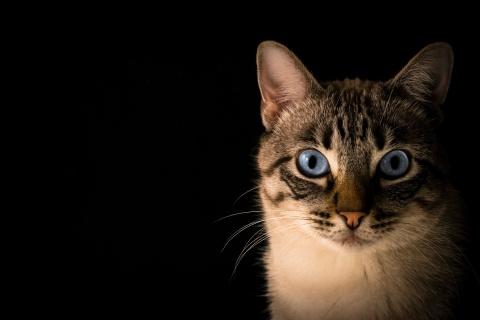

In [9]:

# Read the image
img = cv2.imread('Resources/Photos/cat_large.jpg')
resized_img = rescaleFrame(img, scale=0.2)

# Save temporarily and display
cv2.imwrite('temp_image.jpg', resized_img)
display(Image('temp_image.jpg'))

We can also set different resolution for live stream video for lower computational strain

In [3]:
import cv2

def changeRes(capture, width, height):
    capture.set(3, width)   # 3 = cv2.CAP_PROP_FRAME_WIDTH
    capture.set(4, height)  # 4 = cv2.CAP_PROP_FRAME_HEIGHT

# Open default webcam
capture = cv2.VideoCapture(0)

# Change webcam resolution
changeRes(capture, 320, 240)  # or 320x240, 1280x720, 1920x1080

while capture.isOpened():
    ret, frame = capture.read()
    
    if not ret:
        print("Failed to grab frame.")
        break
    
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(30) & 0xFF == ord('q'): 
        break

capture.release()
cv2.destroyAllWindows()


2025-07-20 00:33:17.604 python[26448:6547868] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


Adding Text/Shapes to videos/images, this is useful for labeling data and for computer vision tasks. 

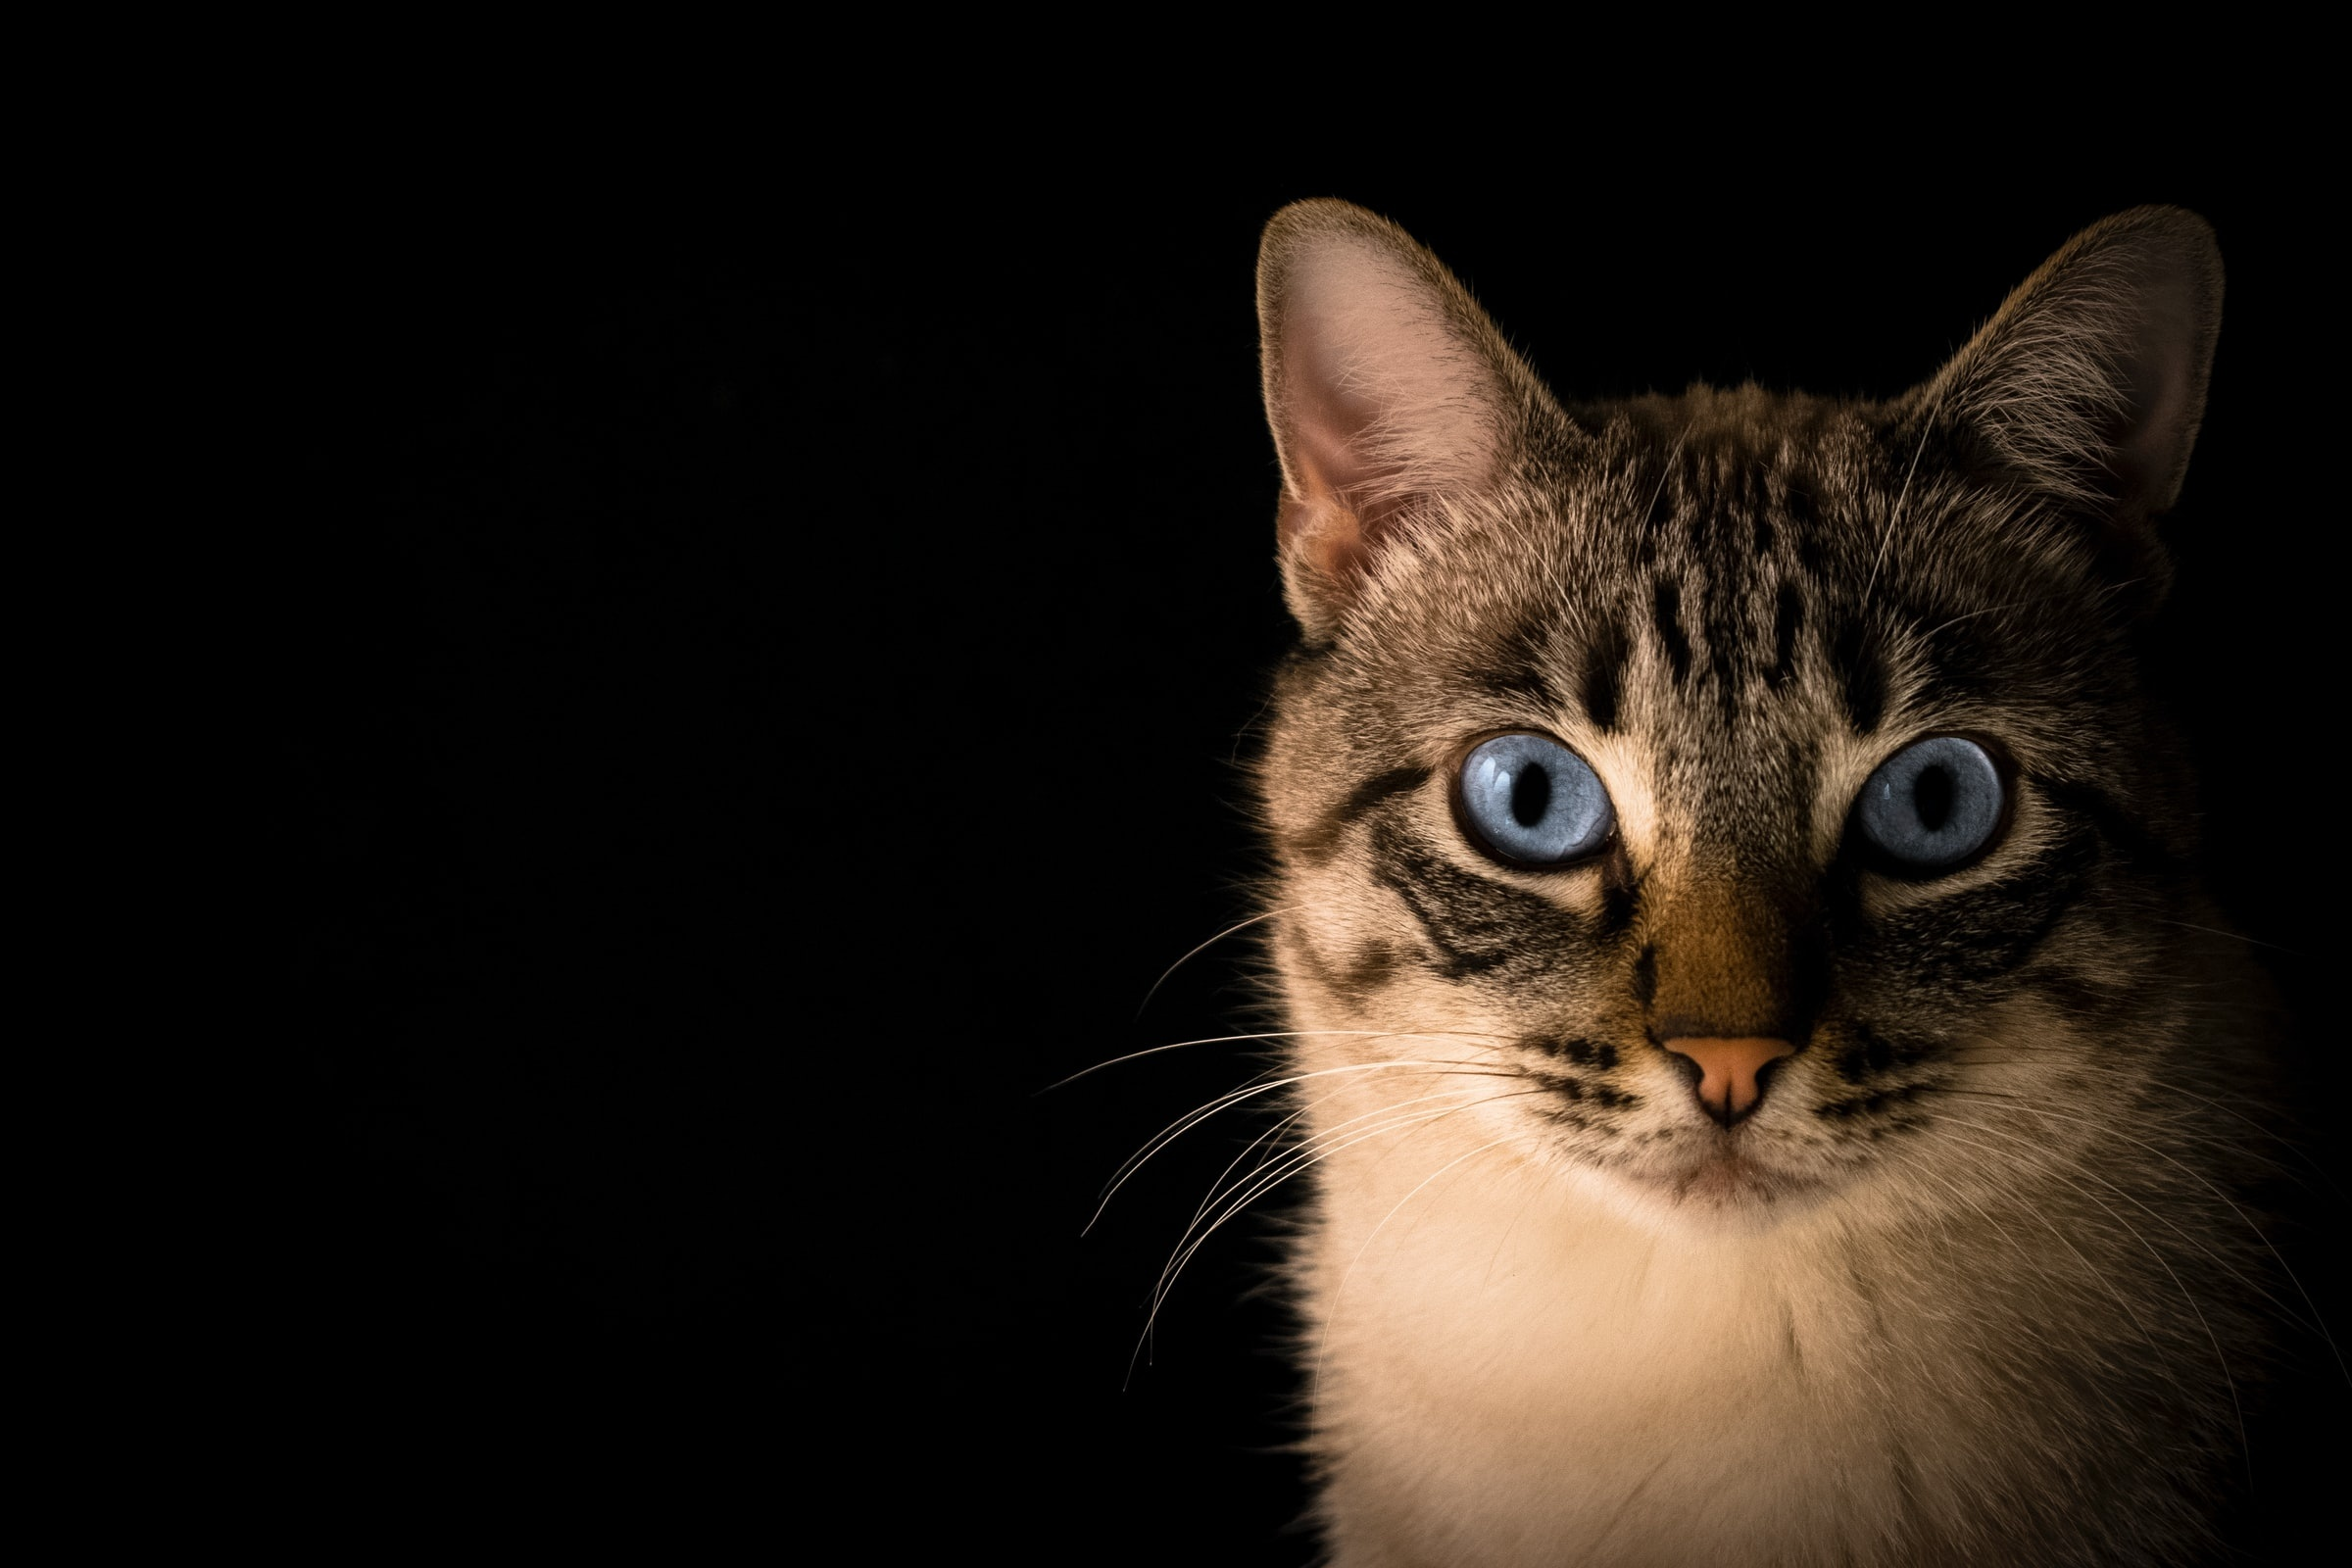

In [6]:
import cv2 as cv
import numpy as np
# Read the image
img = cv.imread('Resources/Photos/cat_large.jpg')
height, width = img.shape[:2] # this gets the height and width of the image

# Save temporarily and display
cv.imwrite('temp_image.jpg', img)
display(Image('temp_image.jpg'))


Create a blank image of the size of the cat image that we can draw on. 

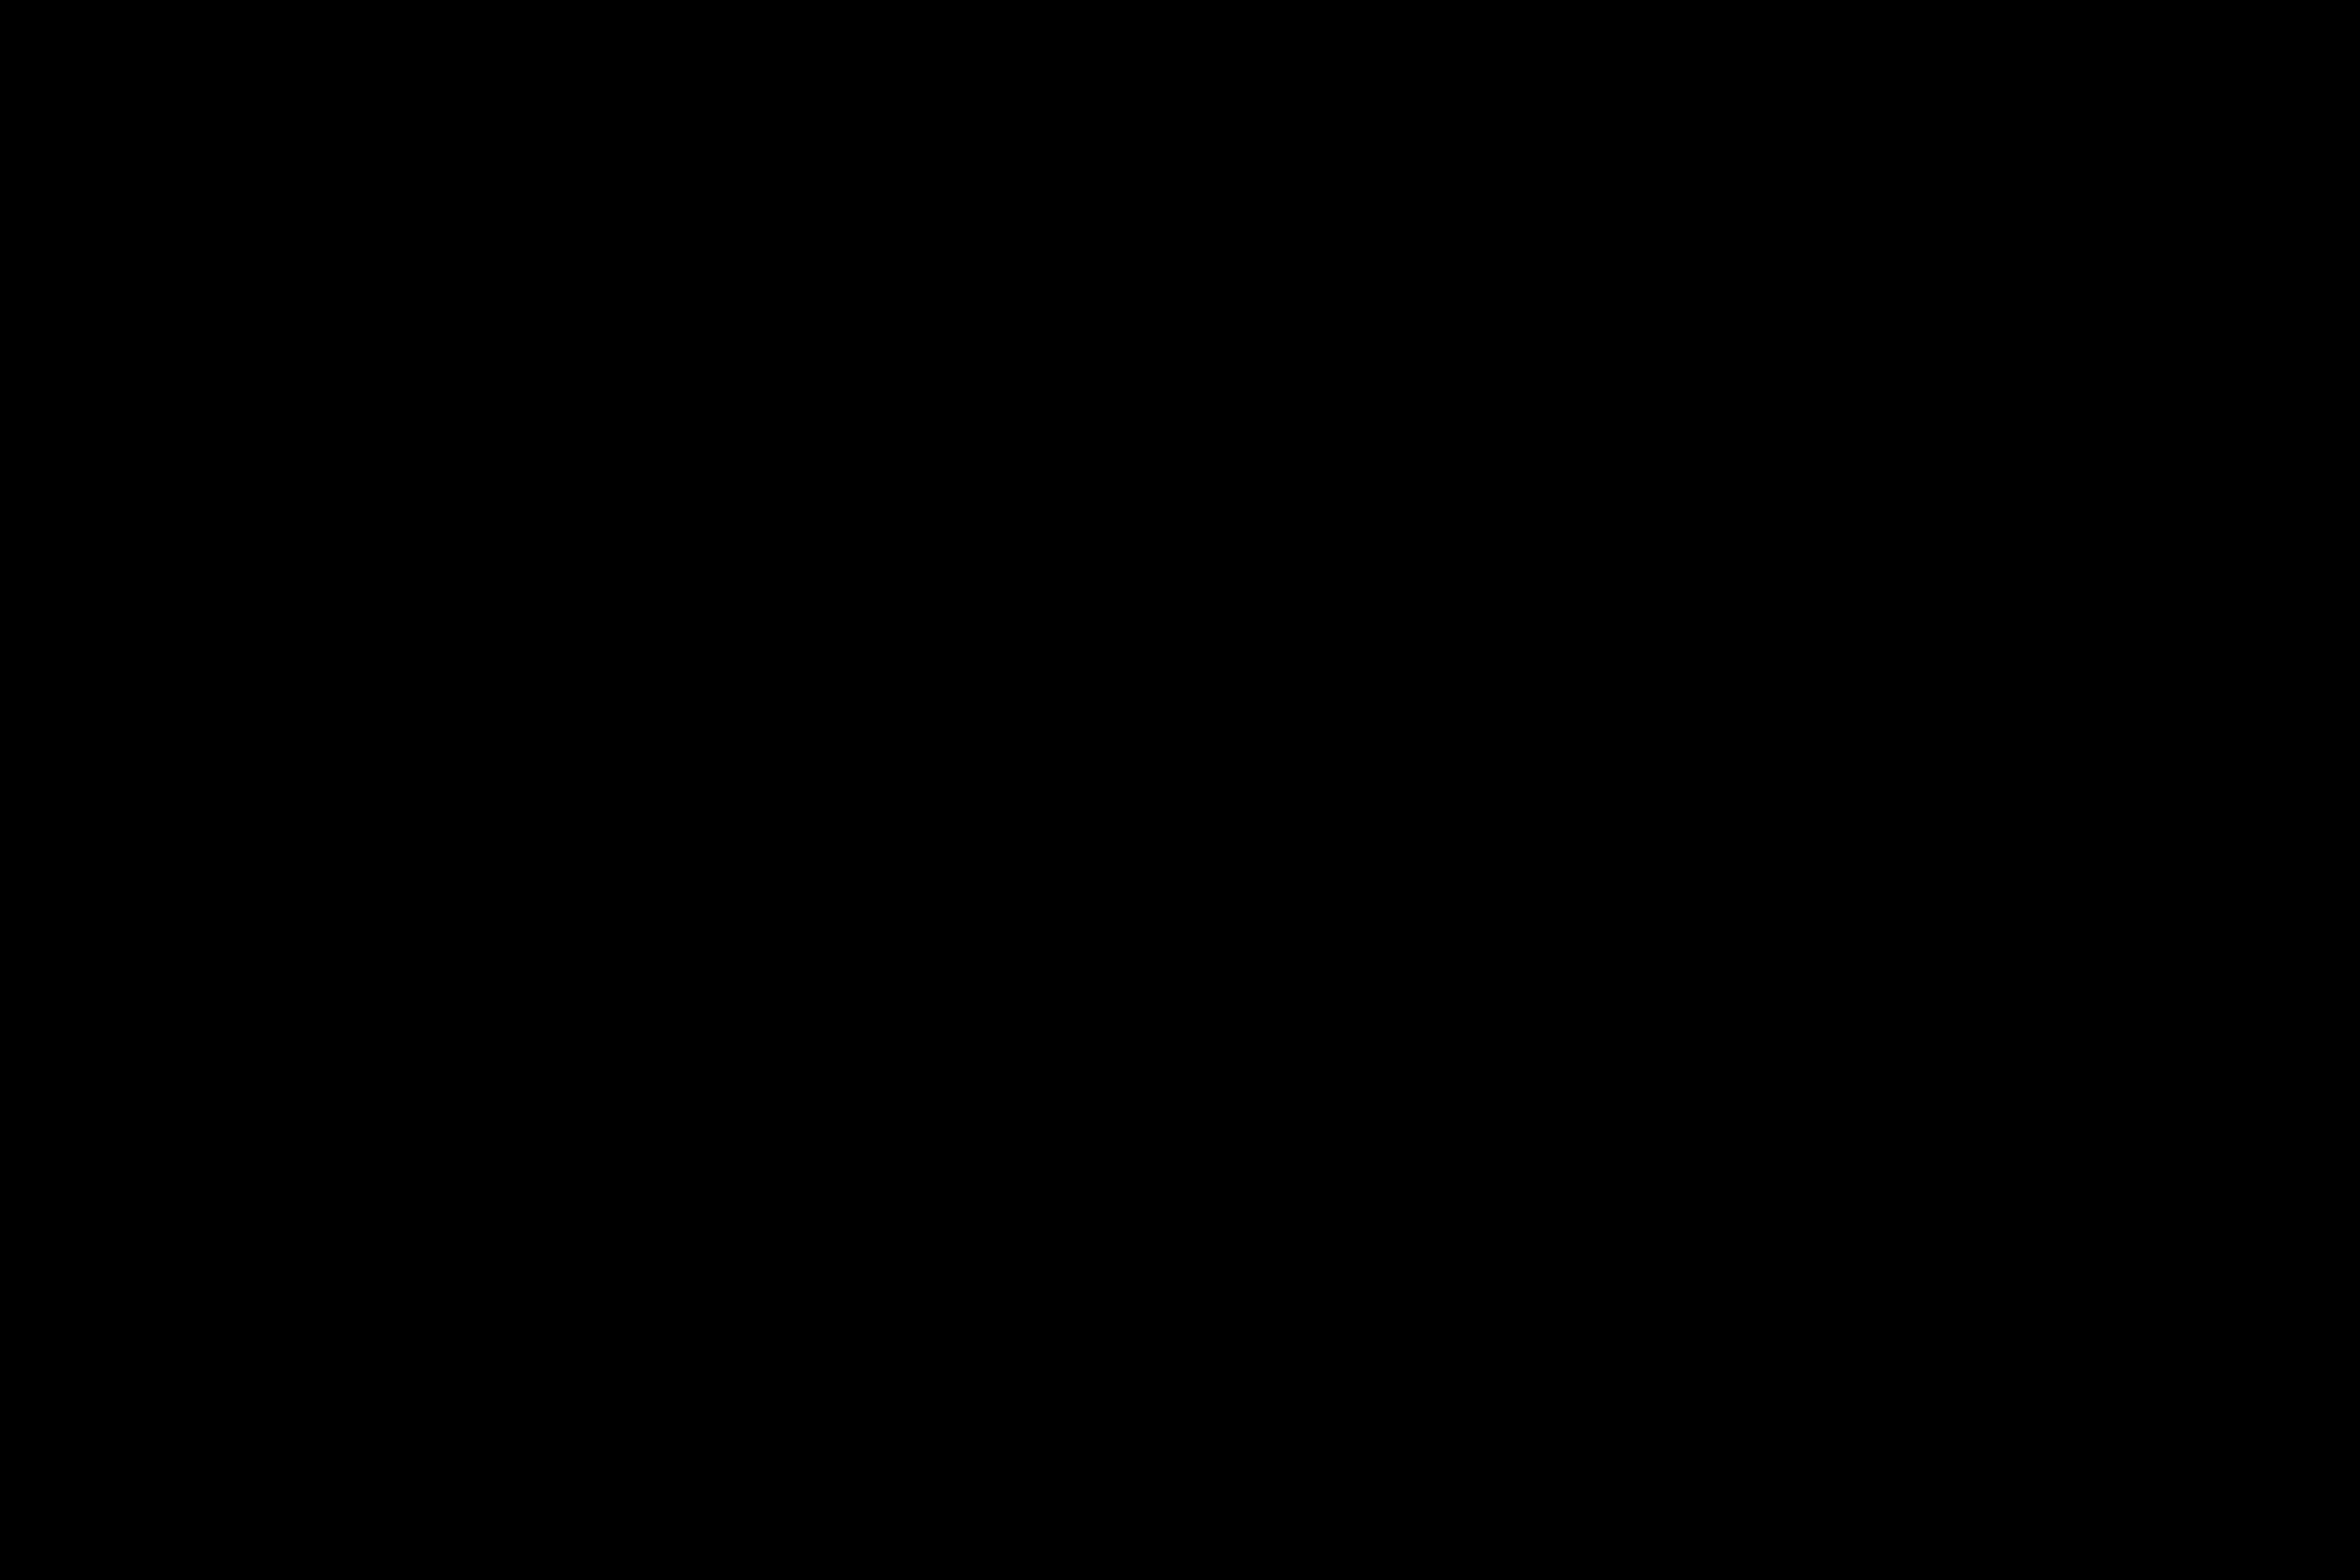

In [7]:
blank = np.zeros((height, width, 3), dtype='uint8') # this creates a blank image of the same size as the original image, 3 = the color channels

cv.imwrite('temp_image_blank.jpg', blank)

display(Image('temp_image_blank.jpg'))

We will create a box on this blank image to represent a different color 

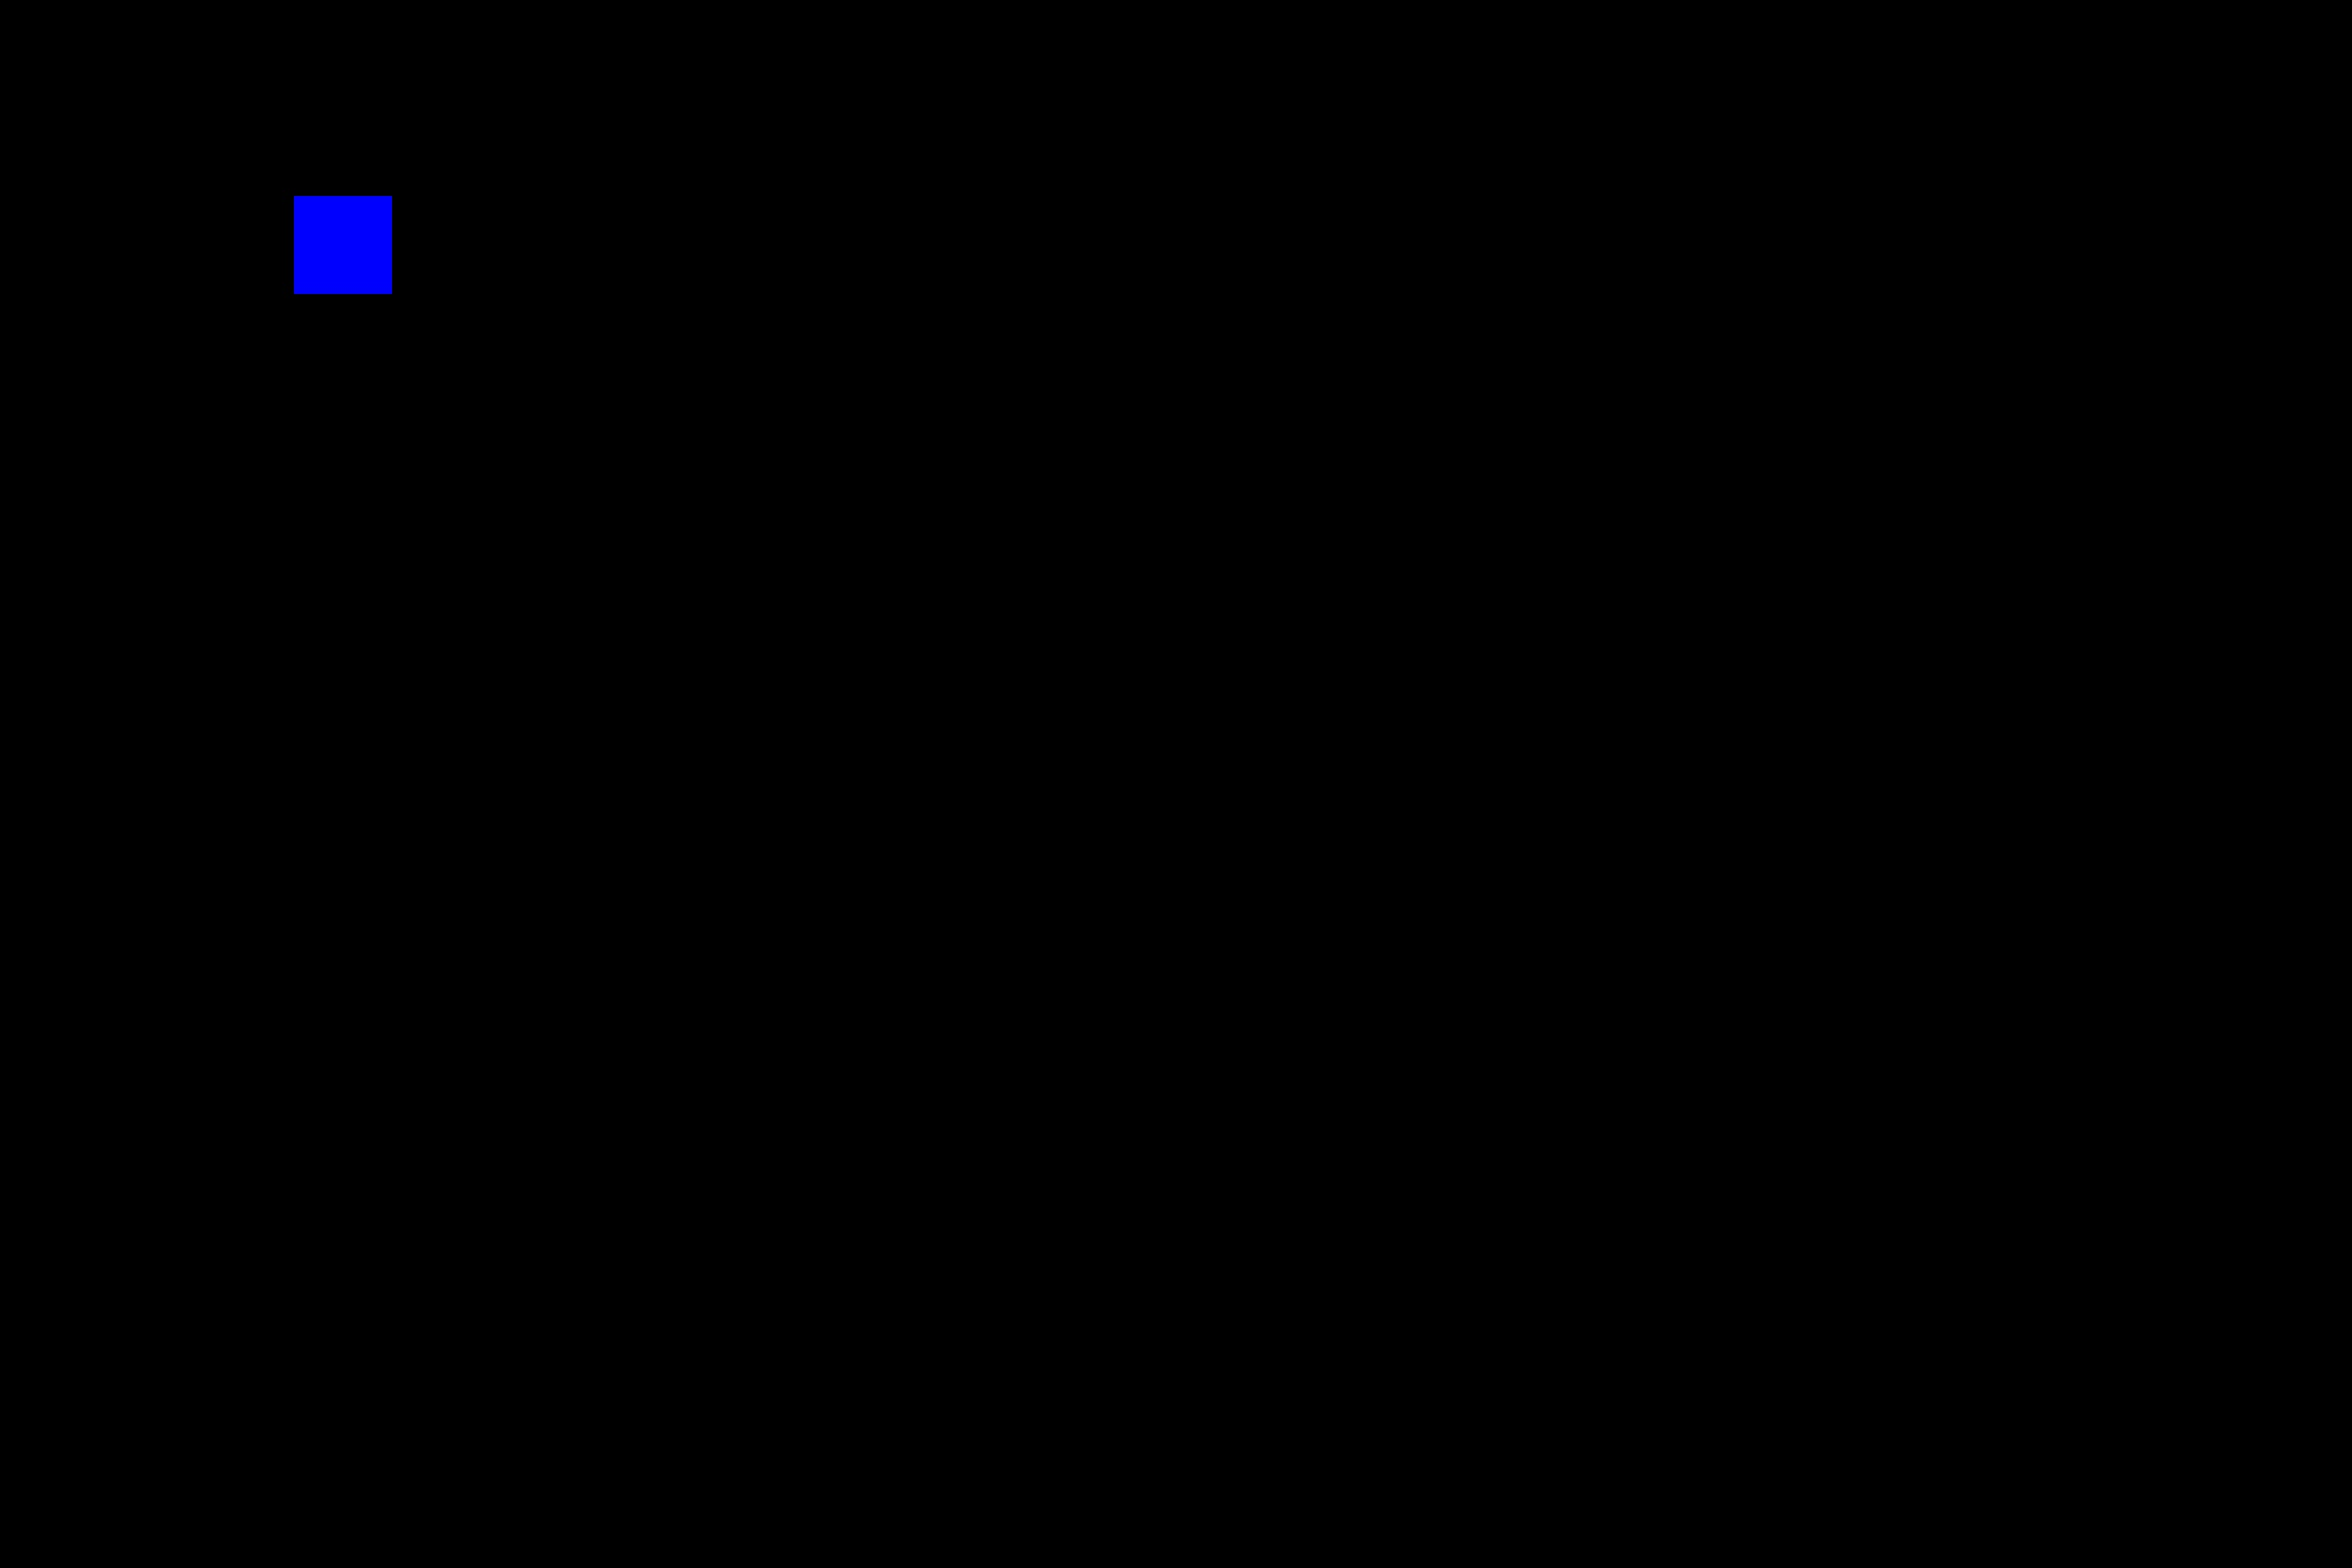

In [ ]:
blank[200:300, 300:400] = 255, 0, 0 # this changes the color of the pixels from 200 to 300 (height) and 300 to 400 to blue
cv.imwrite('temp_image_blank.jpg', blank)
display(Image('temp_image_blank.jpg'))

We will now draw a rectangle using opencv library

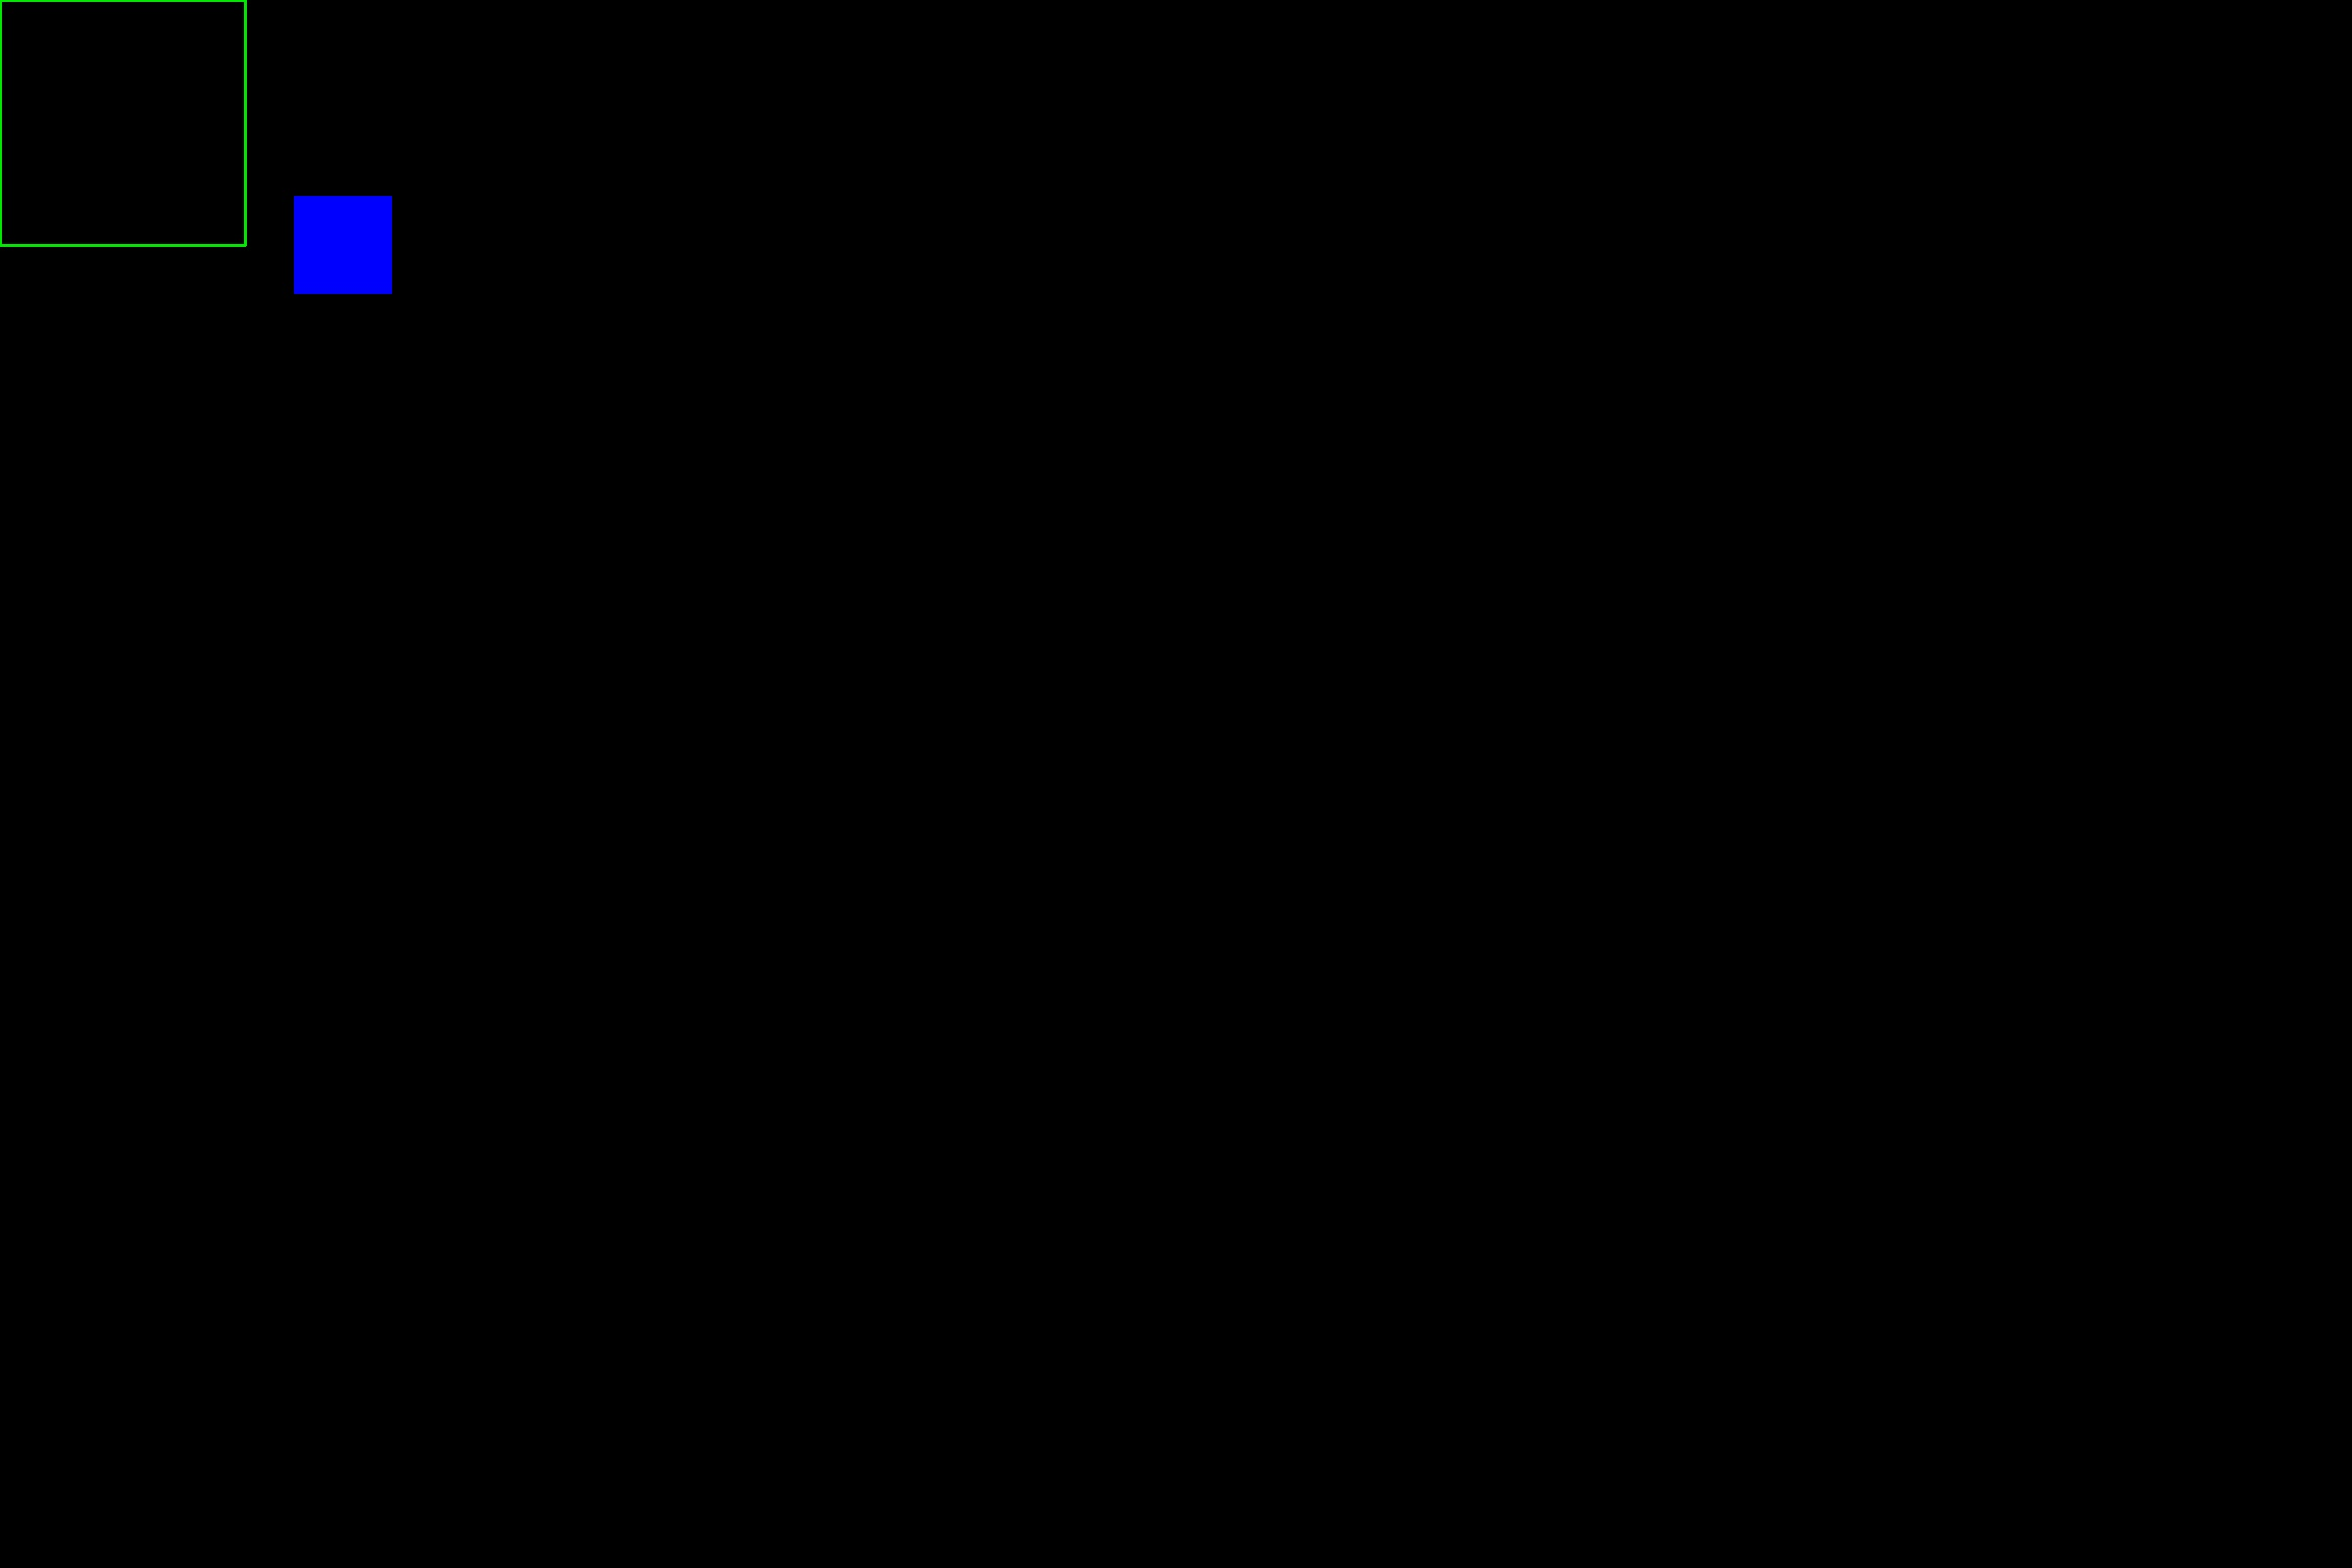

In [9]:
cv.rectangle(blank, (0,0),(250,250), (0,234,0), thickness=2)
cv.imwrite('temp_image_blank.jpg', blank)
display(Image('temp_image_blank.jpg'))

We can also draw a circle 

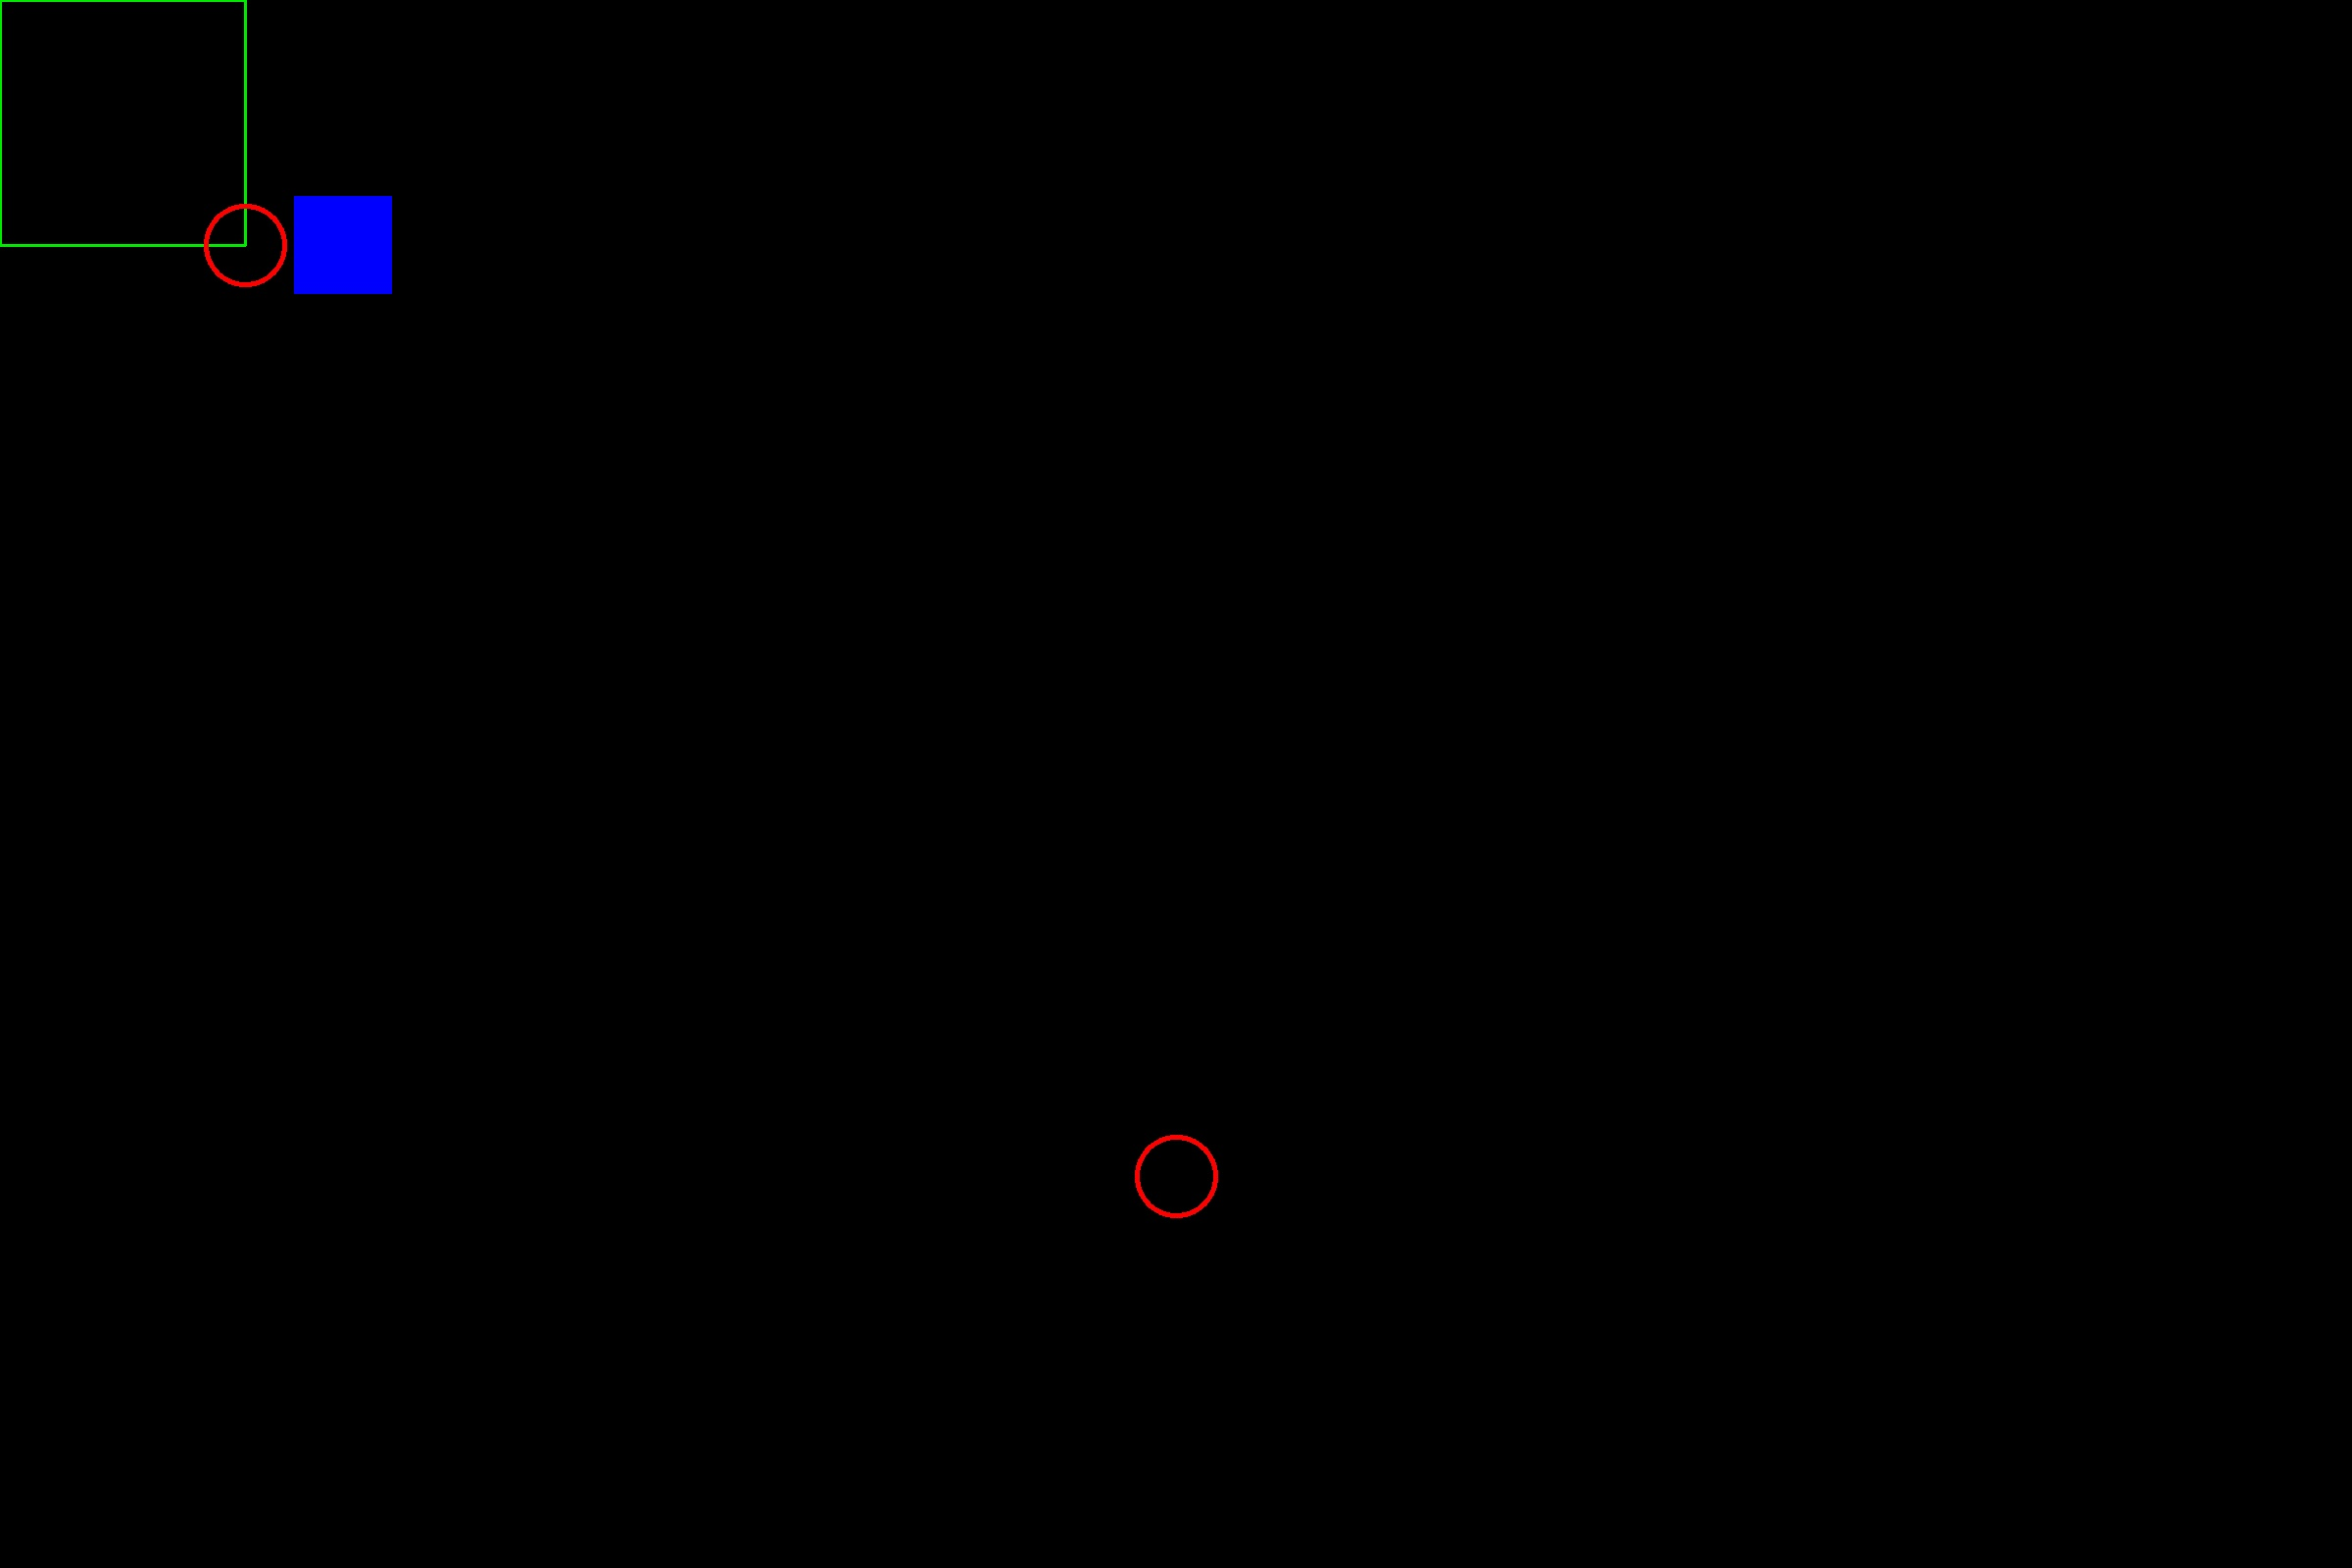

In [11]:
cv.circle(blank, (blank.shape[1]//2,blank.shape[1]//2), 40, (0,0,255), thickness=3)
cv.imwrite('temp_image_blank.jpg', blank)
display(Image('temp_image_blank.jpg'))

This is how we draw a line 

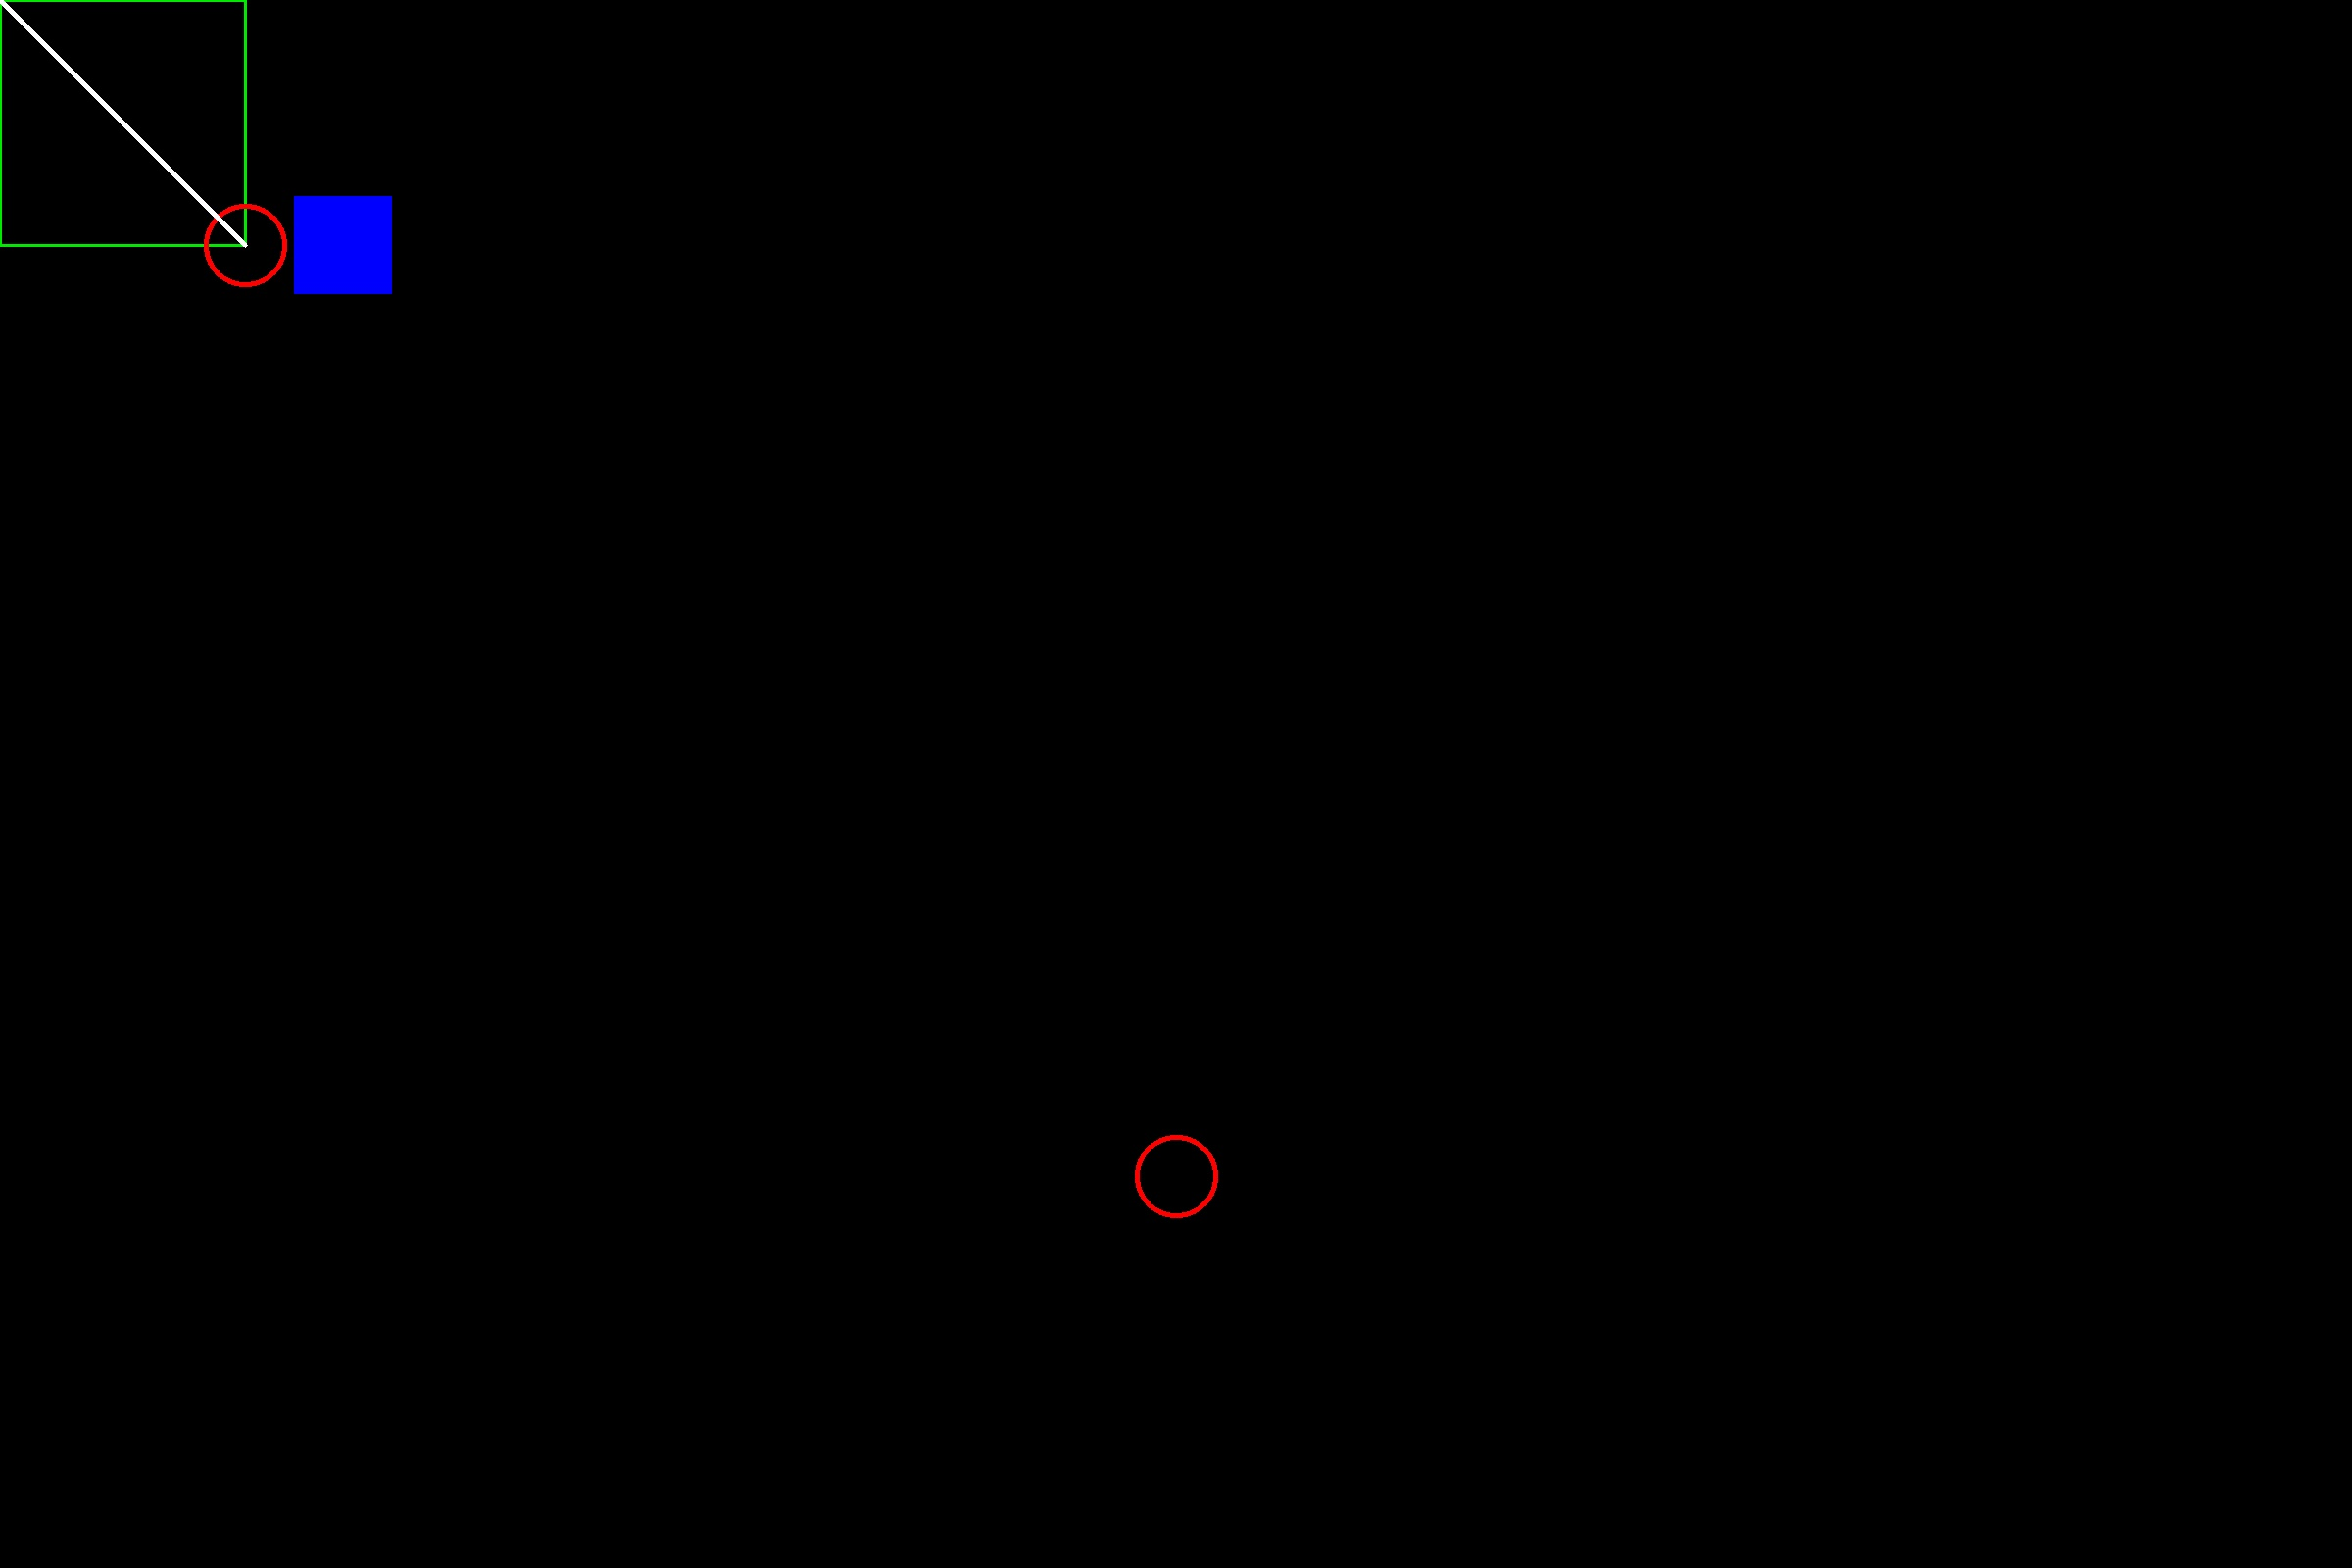

In [13]:
cv.line(blank, (0,0), (250,250), (255,255,255), thickness=3)
cv.imwrite('temp_image_blank.jpg', blank)
display(Image('temp_image_blank.jpg'))

How to write text on a image

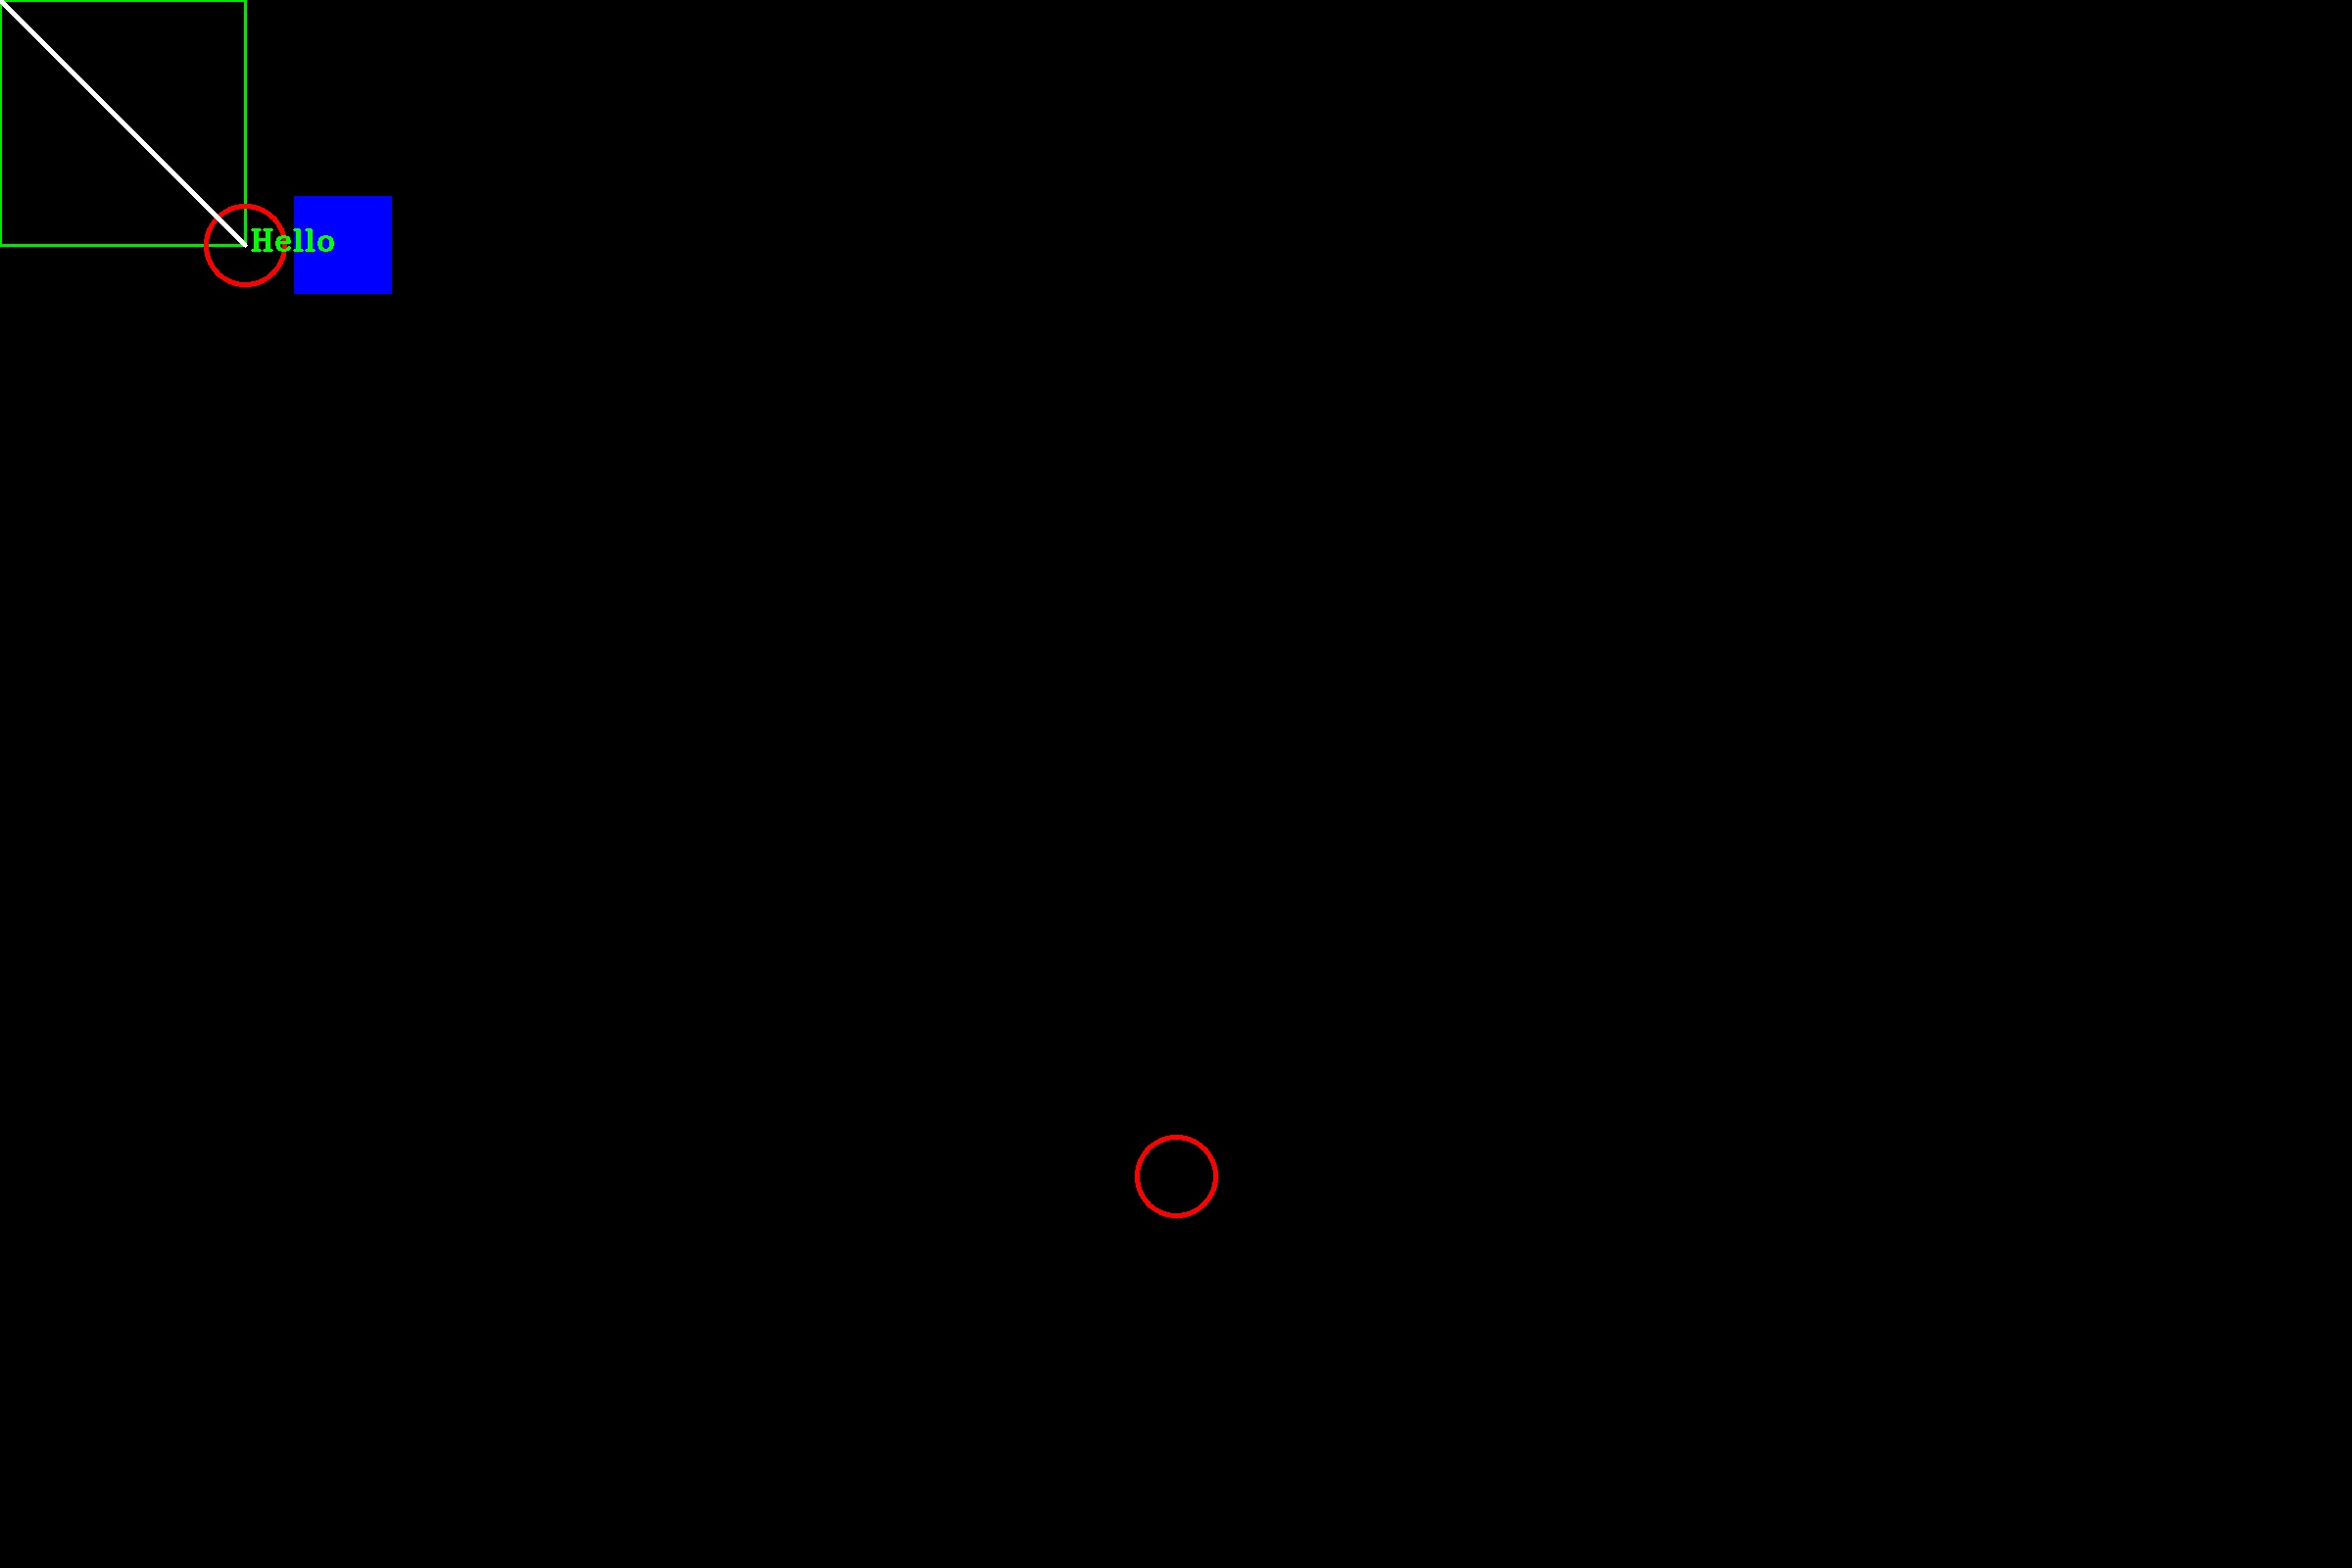

In [14]:
cv.putText(blank, 'Hello', (255,255), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), thickness=2)
cv.imwrite('temp_image_blank.jpg', blank)
display(Image('temp_image_blank.jpg'))

This created a green rectangle in the top left corner of the blank image